In [1]:
!pip install langgraph

Defaulting to user installation because normal site-packages is not writeable


In [2]:
from langgraph.graph import StateGraph, START, END
from typing_extensions import TypedDict

In [3]:
class MyGraphState(TypedDict):
  count: int
  msg: str

In [4]:
def counter(state: MyGraphState):
  state["count"] += 1
  state["msg"] = f"counter 함수가 {state['count']}회 호출되었습니다.)"
  return state

In [5]:
workflow = StateGraph(MyGraphState)

In [6]:
workflow.add_node("Node1", counter)
workflow.add_node("Node2", counter)
workflow.add_node("Node3", counter)

In [7]:
workflow.add_edge(START, "Node1")
workflow.add_edge("Node1", "Node2")
workflow.add_edge("Node2", "Node3")

workflow.add_edge("Node3", END)

In [8]:
app = workflow.compile()

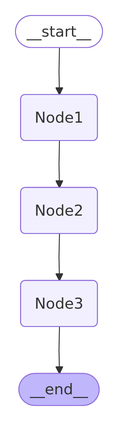

In [9]:
# pip install pyppeteer
import nest_asyncio
nest_asyncio.apply()

from langchain_core.runnables.graph_mermaid import MermaidDrawMethod
from PIL import Image
from io import BytesIO

png_data = app.get_graph().draw_mermaid_png(draw_method=MermaidDrawMethod.PYPPETEER)

img = Image.open(BytesIO(png_data))

w = img.size[0] // 3
h = img.size[1] // 3

resized_img = img.resize((w, h), Image.Resampling.LANCZOS)
resized_img.show()

In [10]:
app.invoke({"count": 0, "msg":"hello"})

{'count': 3, 'msg': 'counter 함수가 3회 호출되었습니다.)'}